In [288]:
from astropy import units as u
import numpy as np
%matplotlib inline
import pylab as pl
from astropy.visualization import simple_norm
from astropy.modeling.models import Gaussian2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

pl.style.use('dark_background')
pl.rcParams['figure.figsize'] = (12,12)
pl.rcParams['font.size'] = 16
pl.rcParams['image.cmap'] = 'hot'

In [289]:
imshape = [64,64]
yy,xx = np.indices(imshape)
xx = xx-imshape[1]/2
yy = yy-imshape[0]/2
rr = ((xx)**2 + (yy)**2)**0.5
rrint = rr.astype('int')

img = Gaussian2D(x_stddev=2,y_stddev=4,theta=25*u.deg)(xx,yy)
img += np.random.randn(*img.shape) * 0.05
ftim = np.fft.fftshift(np.fft.fft2(img))

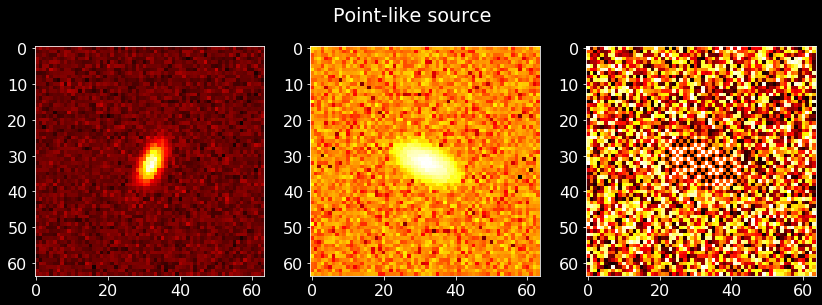

In [325]:
pl.figure(figsize=(14,4.5))
pl.subplot(1,3,1).imshow(img)
pl.suptitle("Point-like source")
_=pl.subplot(1,3,2).imshow(np.abs(ftim),
                           norm=simple_norm(np.abs(ftim), stretch='log'))
_=pl.subplot(1,3,3).imshow(np.angle(ftim).value,)

In [327]:
def show_im_and_ft(ft_sample, title="Filled outer apertures (long-baseline only)", normim=img):
    fig = pl.figure(figsize=(14,4.5))
    ax1 = pl.subplot(1,3,1)
    im = ax1.imshow(np.abs(np.fft.ifft2(ft_sample)), norm=simple_norm(normim))
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, ax=ax1)
    ax1.set_title('Image')
    _=pl.suptitle(title)
    pl.subplot(1,3,2).imshow(np.abs(ft_sample),
                               norm=simple_norm(np.abs(ftim), stretch='log', min_percent=1))
    pl.title("FT amp.")
    _=pl.subplot(1,3,3).imshow(np.angle(ft_sample), vmin=-np.pi, vmax=np.pi)
    pl.title("FT phase")
    pl.subplots_adjust(wspace=0.35)

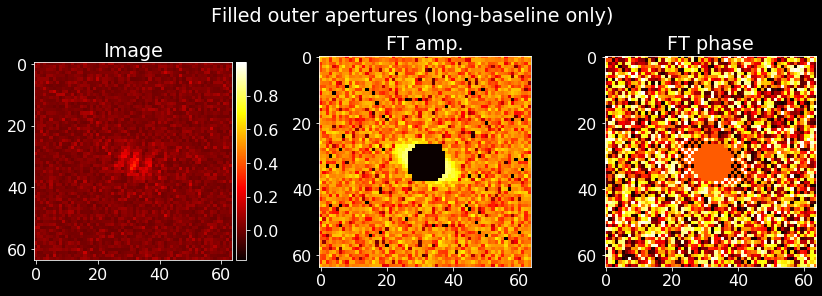

In [328]:
ft_sample = np.zeros_like(ftim)

ft_sample[rrint > 5] = ftim[rrint > 5]

show_im_and_ft(ft_sample,)

In [329]:
# introduce phase error
phase = np.angle(ftim)
amp = np.abs(ftim)

bad_phase = phase.copy()
bad_phase[32:64,32:64] += np.pi/2 * u.rad

ftim_degraded = amp * np.exp(1j * bad_phase.to(u.rad).value)

# Phase errors are asymmetric

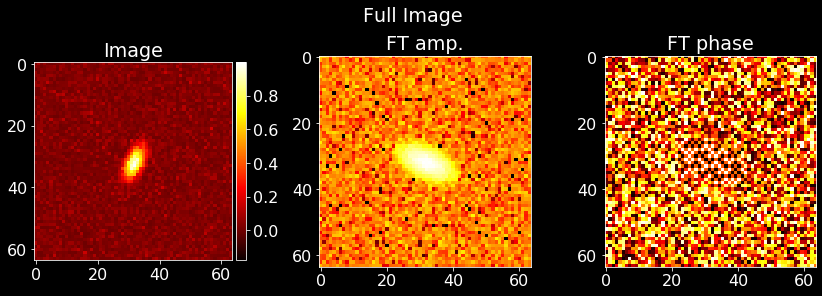

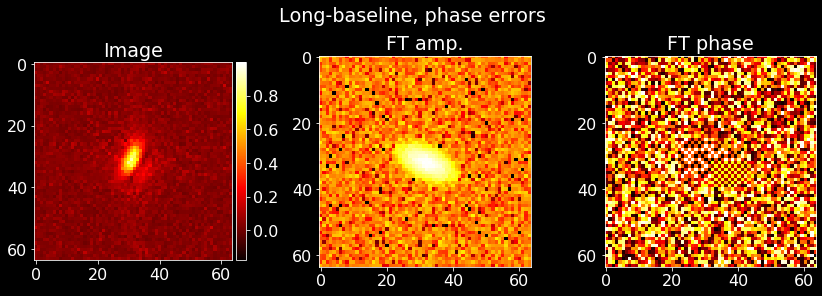

In [330]:
show_im_and_ft(ftim, title="Full Image")
show_im_and_ft(ftim_degraded, title="Long-baseline, phase errors")

In [331]:
# introduce amplitude error
phase = np.angle(ftim)
amp = np.abs(ftim)

bad_amp = amp.copy()
bad_amp[32:64,32:64] *= 2

ftim_degraded = bad_amp * np.exp(1j * phase.to(u.rad).value)

# Amplitude errors are symmetric

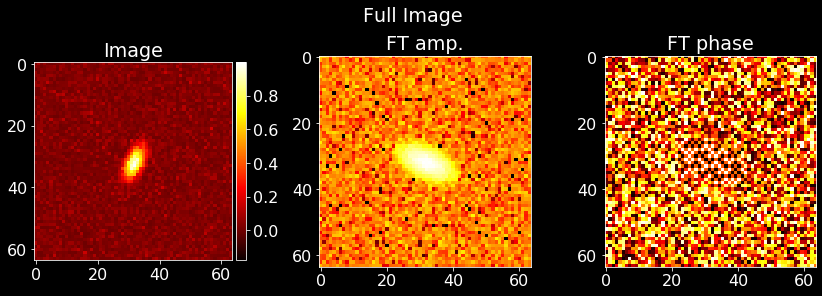

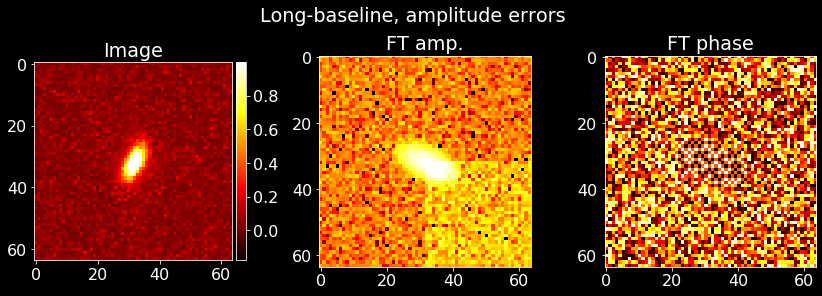

In [332]:
show_im_and_ft(ftim, title="Full Image")
show_im_and_ft(ftim_degraded, title="Long-baseline, amplitude errors")

# Make a synthetic VLA-like array

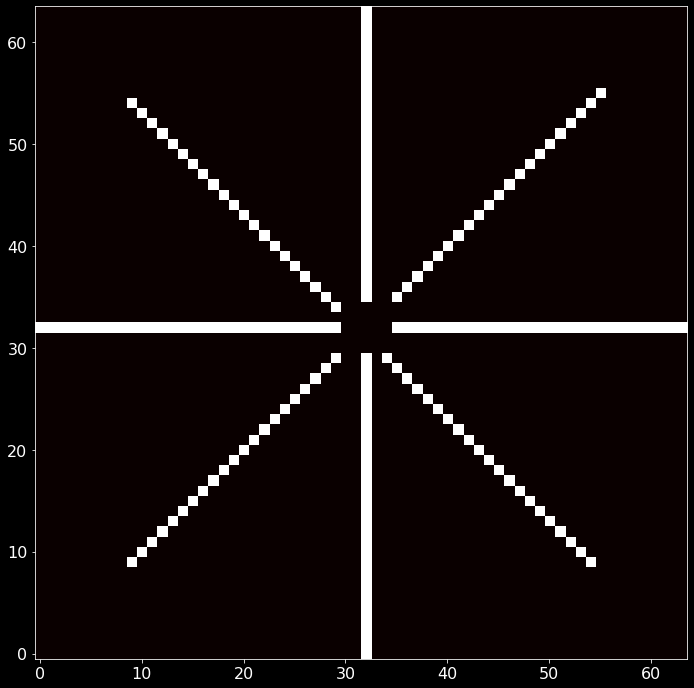

In [333]:
sampling = np.zeros(img.shape, dtype='bool')
sampling[32,:] = True
sampling[:,32] = True
diagy,diagx = np.diag_indices_from(sampling)
sampling[diagy,diagx] = True
sampling[diagy[::-1], diagx] = True
#sampling[diagy[:32], diagx[:32]] = True
#sampling[diagy[31::-1], diagx[32:]] = True
sampling[30:35,30:35] = False
sampling[rrint>32] = False
pl.imshow(sampling, origin='lower')

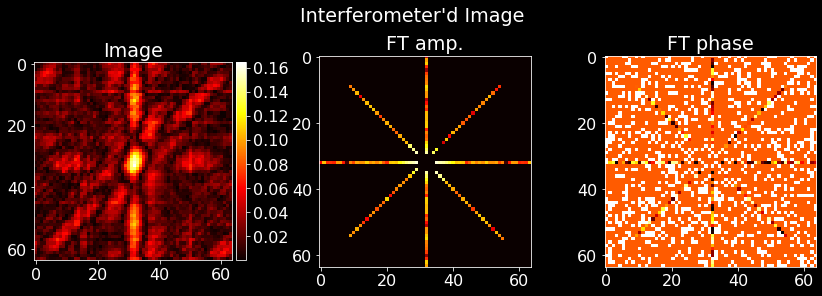

In [334]:
ftsample = ftim * sampling
sampled_img = np.abs(np.fft.ifft2(ftsample))
show_im_and_ft(ftsample, title="Interferometer'd Image", normim=sampled_img)

In [335]:
# again, introduce phase error
phase = np.angle(ftsample)
amp = np.abs(ftsample)

bad_phase = phase.copy()
bad_phase[32:64,32:64] += np.pi/2 * u.rad

ftsample_degraded = amp * np.exp(1j * bad_phase.to(u.rad).value)

# Phase errors in realistically-sampled array

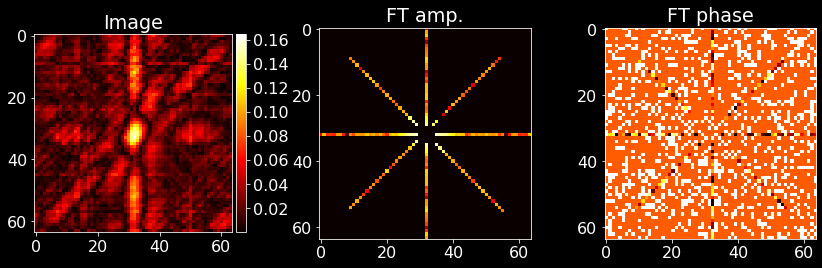

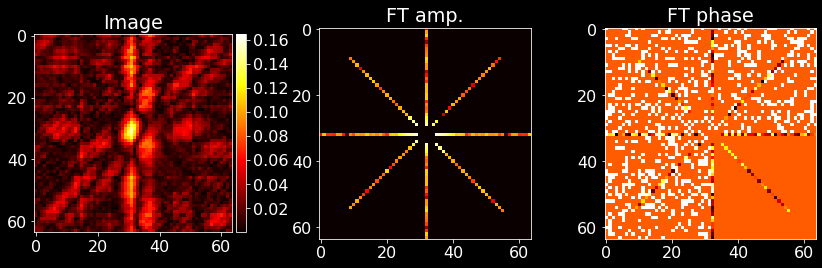

In [336]:
show_im_and_ft(ftsample, title="", normim=sampled_img)
show_im_and_ft(ftsample_degraded, title="", normim=sampled_img)

In [337]:
# introduce amplitude error again
phase = np.angle(ftsample)
amp = np.abs(ftsample)

bad_amp = amp.copy()
bad_amp[32:64,32:64] *= 2

ftsample_degraded = bad_amp * np.exp(1j * phase.to(u.rad).value)

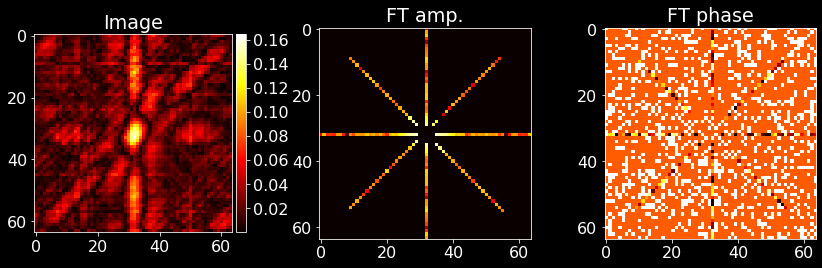

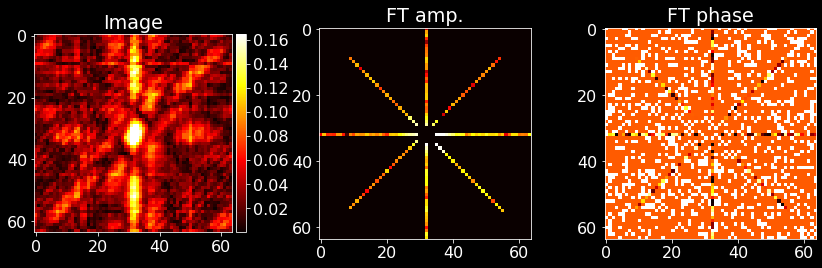

In [338]:
show_im_and_ft(ftsample, title="", normim=sampled_img)
show_im_and_ft(ftsample_degraded, title="", normim=sampled_img)